#***Eighth MODEL FOR ALPHABET SOUP CHARITY OPTIMIZATION***

## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

#  Import and read the charity_data.csv.
# Application is not a program or software, but applications for charity funding.
import pandas as pd 

!pip install keras-tuner
!pip install pyyaml h5py # https://www.tensorflow.org/tutorials/keras/save_and_load

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application1_df = application_df.drop(columns=['EIN', 'NAME'])
application1_df.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [ ]:
# Determine the number of unique values in each column.
# https://datascienceparichay.com/article/pandas-count-of-unique-values-in-each-column/
print(application1_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


For columns that have more than 10 unique values, determine the number of data points for each unique value.
Use the number of data points for each unique value to pick a cutoff point to bin rare categorical variables together in a new value (other) and then check if the binning was successful. Set cutoff for other to <500.

Only APPLICATION_TYPE and CLASSIFICATION object types have more than 10 unique values.

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
print(application1_df['APPLICATION_TYPE'].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [ ]:
# https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0
# application1_df['APPLICATION_TYPE'].mask(application1_df['APPLICATION_TYPE'].map(application1_df['APPLICATION_TYPE'].value_counts()) < 500, 'Other')


In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Binning starts at T13 to reduce features to <11 unique features, into the "Other" category.

application_types_to_replace = ["T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application1_df['APPLICATION_TYPE'] = application1_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application1_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
print(application1_df['CLASSIFICATION'].value_counts())

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application2_df = application1_df

In [ ]:
# Continue for now. Don't want to switch away from string. Find another way. '1' doesn't work either.
# application2_df[application2_df['CLASSIFICATION' > 1]]

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# Match starter code value Other value 2261.
classifications_to_replace = ["C2150", "C4500", "C2561", "C8210", "C4120", "C1283", "C2380", "C1732", "C1728", "C1900",
                              "C3700", "C2500", "C1570", "C1245", "C1820", "C2400", "C1257", "C1600", "C0", "C2710",
                              "C1260", "C3200", "C1256", "C1234", "C1246", "C1267", "C2170", "C1248", "C2600", "C1370",
                              "C5200", "C2190", "C4200", "C1236", "C2570", "C1580", "C6100", "C4100", "C1720", "C1237",
                              "C1235", "C1238", "C1278", "C8200", "C1250", "C6000", "C1800", "C1500", "7120", "C8000",
                              "C1240", "C2300", "C7200", "C1400", "C1230", "C1280", "C1300", "C7210", "C7120", "C7100",
                              "C2800", "C2700", "C1270", "C5000", "C4000", "C1700", "C7000"]

# Replace in dataframe
for cls in classifications_to_replace:
    application1_df['CLASSIFICATION'] = application1_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application1_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
application1_df.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [ ]:
application1_df.value_counts('IS_SUCCESSFUL')

IS_SUCCESSFUL
1    18261
0    16038
dtype: int64

In [ ]:
# Check if STATUS adds any value for optimization.
application1_df.value_counts('STATUS')

STATUS
1    34294
0        5
dtype: int64

Try dropping STATUS column. Less than 1% are zero values, no contribution, therefore no change?

In [ ]:
application1_df.value_counts('SPECIAL_CONSIDERATIONS')

SPECIAL_CONSIDERATIONS
N    34272
Y       27
dtype: int64

Also drop SPECIAL_CONSIDERATIONS at <1% contribution.

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`. UOM 19.2.4 Unsupervised Learning
# https://umn.bootcampcontent.com/University-of-Minnesota-Boot-Camp/UofM-VIRT-DATA-PT-12-2022-U-LOLC/-/blob/main/19-Unsupervised-Learning/2/Activities/04-Evr_Preprocessing/Solved/cc_preprocessing_solution.ipynb
# Should the INCOME_AMT be used as a dummy value? Currently is an object, showing a range.
application_dummies_df = pd.get_dummies(application1_df[['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']])

In [ ]:
# print(application_dummies)
# application_dummies_df.sample(5)
application_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   APPLICATION_TYPE_Other        34299 non-null  uint8
 1   APPLICATION_TYPE_T10          34299 non-null  uint8
 2   APPLICATION_TYPE_T19          34299 non-null  uint8
 3   APPLICATION_TYPE_T3           34299 non-null  uint8
 4   APPLICATION_TYPE_T4           34299 non-null  uint8
 5   APPLICATION_TYPE_T5           34299 non-null  uint8
 6   APPLICATION_TYPE_T6           34299 non-null  uint8
 7   APPLICATION_TYPE_T7           34299 non-null  uint8
 8   APPLICATION_TYPE_T8           34299 non-null  uint8
 9   APPLICATION_TYPE_T9           34299 non-null  uint8
 10  AFFILIATION_CompanySponsored  34299 non-null  uint8
 11  AFFILIATION_Family/Parent     34299 non-null  uint8
 12  AFFILIATION_Independent       34299 non-null  uint8
 13  AFFILIATION_National          3

In [ ]:
# Join the dataframes
application_dummies_df = pd.concat([application1_df, application_dummies_df], axis=1)
application_dummies_df.head(3)
# application_dummies_df.info

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,...,0,0,0,0,0,0,0,0,1,0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,...,1,0,0,0,0,0,0,0,1,0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
application_dummies_df.columns.values

array(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'APPLICATION_TYPE_T9', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ',
       'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'USE_CASE_ProductDev', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_C

In [ ]:
# Remove categorical columns to have only numeric values in data set.
application_dummies2_df = application_dummies_df.drop(columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
                          'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT'])

In [ ]:
# Remove columns with possibly no added value.
application_dummies2_df = application_dummies2_df.drop(columns=['STATUS', 'SPECIAL_CONSIDERATIONS_Y', 'SPECIAL_CONSIDERATIONS_N'])

In [ ]:
application_dummies2_df.sample(3)

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
32159,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12061,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2960,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
application_dummies2_df.columns.values

array(['IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National',
       'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-

In [ ]:
# Drop the IS_SUCCESSFUL and STATUS columns
# IS_SUCCESSFUL is not listed above but is in application1_df
# application_dummies3_df = application_dummies2_df.drop(columns=['IS_SUCCESSFUL', 'STATUS', 'SPECIAL_CONSIDERATIONS_Y', 'SPECIAL_CONSIDERATIONS_N'])

In [ ]:
# Check if IS_SUCCESSFUL and STATUS was dropped
# application_dummies3_df.tail(3)

In [ ]:
# application_dummies3_df.columns.values

In [ ]:
# application_dummies2_df = application_dummies2_df.drop(columns=['STATUS'])

In [ ]:
# Split our preprocessed data into our features and target arrays
# Split IS_SUCCESSFUL from the dataframe for the target array y.
# Features array X
X = application_dummies2_df.copy()
X.drop("IS_SUCCESSFUL", axis=1, inplace=True)
X.head(3)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Obtain/verify dimensions for neural network model.
np.shape(X)

(34299, 40)

In [ ]:
y = application1_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

In [ ]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [ ]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Zoom NN #2 @ 03:14:30
# Use 80, 30 and 1 units to match starter code results

nn8 = tf.keras.models.Sequential()

# First hidden layer
# Change input dimension to 40. Removed STATUS and SPECIAL_CONSIDERATIONS columns.
nn8.add(tf.keras.layers.Dense(units=80, activation="tanh", input_dim=40))

# Second hidden layer
nn8.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Output layer
nn8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3280      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
# Use epochs=100 to match starter code.
fit_model = nn8.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5714 - accuracy: 0.7217
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5564 - accuracy: 0.7293
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5525 - accuracy: 0.7331
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7317
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7310
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7323
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7325
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5472 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7338
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5454 - accura

<Axes: title={'center': 'Epoch Accuracy Log'}, xlabel='Epoch Count', ylabel='Accuracy'>

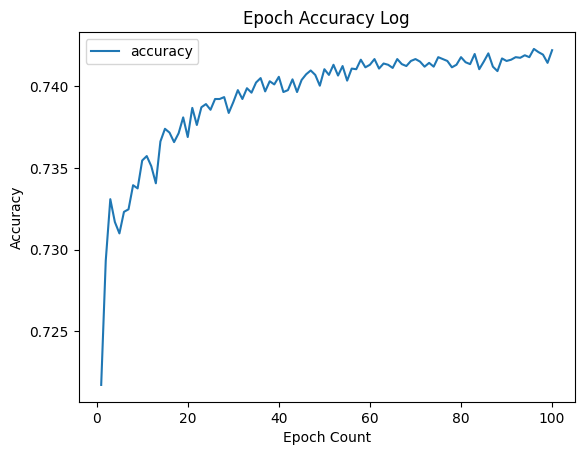

In [ ]:
# Plotting the accuracy snip from Chris/Slack
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
accuracy_df.plot(xlabel = 'Epoch Count', ylabel='Accuracy', y = 'accuracy', title='Epoch Accuracy Log')

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5526 - accuracy: 0.7255 - 492ms/epoch - 2ms/step
Loss: 0.5525948405265808, Accuracy: 0.7254810333251953


In [ ]:
# Export our model to HDF5 file
# https://www.tensorflow.org/guide/keras/serialization_and_saving

nn8.save("AlphabetSoupCharity8.h5")